In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('sales_clean.csv', index_col="sale_date", parse_dates=True)

In [120]:
df.head()

,product_id,sales_rep,region,sales_amount,quantity_sold,product_category,unit_cost,unit_price,customer_type,discount,payment_method,sales_channel,region_and_sales_rep,year_month
sale_date,,,,,,,,,,,,,,
2023-02-03,1052,bob,north,5053.97,18,furniture,152.75,267.22,returning,0.09,cash,online,north-bob,2023-02
2023-04-21,1093,bob,west,4384.02,17,furniture,3816.39,4209.44,returning,0.11,cash,retail,west-bob,2023-04
2023-09-21,1015,david,south,4631.23,30,food,261.56,371.40,returning,0.20,bank_transfer,retail,south-david,2023-09
2023-08-24,1072,bob,south,2167.94,39,clothing,4330.03,4467.75,new,0.02,credit_card,retail,south-bob,2023-08
2023-03-24,1061,charlie,east,3750.20,13,electronics,637.37,692.71,new,0.08,credit_card,online,east-charlie,2023-03


In [121]:
df = df.sort_index()

In [122]:
df.head()

,product_id,sales_rep,region,sales_amount,quantity_sold,product_category,unit_cost,unit_price,customer_type,discount,payment_method,sales_channel,region_and_sales_rep,year_month
sale_date,,,,,,,,,,,,,,
2023-01-01,1070,eve,south,783.18,12,furniture,664.33,863.03,returning,0.25,bank_transfer,retail,south-eve,2023-01
2023-01-01,1089,charlie,north,8130.13,35,clothing,4071.01,4304.70,new,0.14,credit_card,online,north-charlie,2023-01
2023-01-01,1008,eve,north,5227.81,38,clothing,4635.23,5075.44,returning,0.05,cash,online,north-eve,2023-01
2023-01-02,1064,david,south,5533.70,10,electronics,2242.01,2282.23,returning,0.20,credit_card,online,south-david,2023-01
2023-01-02,1075,david,west,919.09,26,electronics,4535.38,4557.56,new,0.00,credit_card,online,west-david,2023-01


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-01 to 2024-01-01
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1000 non-null   int64  
 1   sales_rep             1000 non-null   object 
 2   region                1000 non-null   object 
 3   sales_amount          1000 non-null   float64
 4   quantity_sold         1000 non-null   int64  
 5   product_category      1000 non-null   object 
 6   unit_cost             1000 non-null   float64
 7   unit_price            1000 non-null   float64
 8   customer_type         1000 non-null   object 
 9   discount              1000 non-null   float64
 10  payment_method        1000 non-null   object 
 11  sales_channel         1000 non-null   object 
 12  region_and_sales_rep  1000 non-null   object 
 13  year_month            1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 117.2

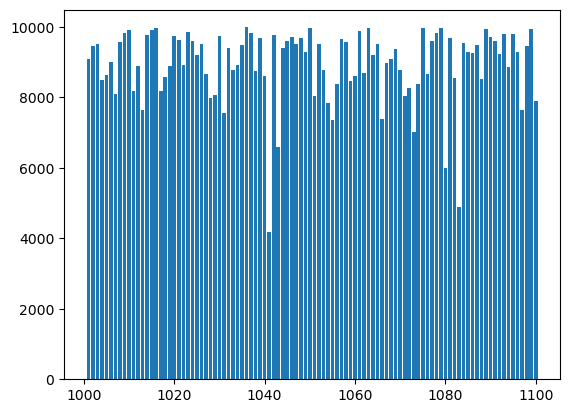

In [124]:
plt.bar(df['product_id'], df['sales_amount'])
plt.show()

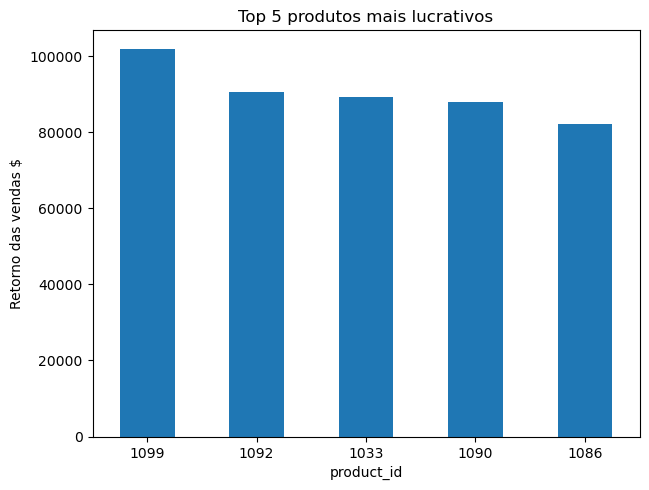

In [159]:
df.groupby('product_id').sum()['sales_amount'].sort_values(ascending = False).head().plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.title('Top 5 produtos mais lucrativos')
plt.ylabel('Retorno das vendas $')
plt.show()

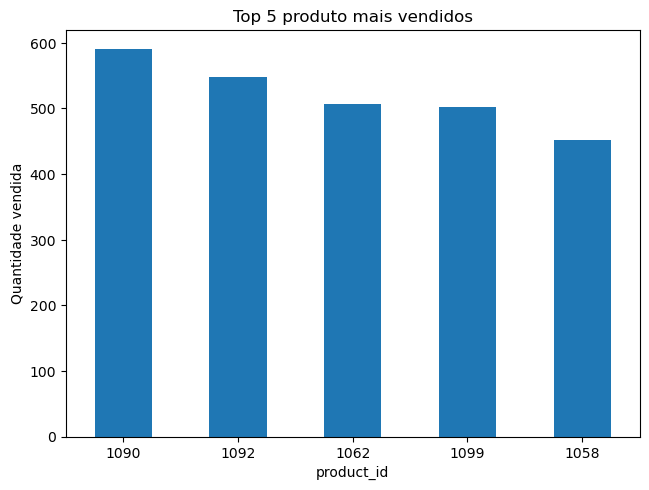

In [142]:
df.groupby('product_id').sum()['quantity_sold'].sort_values(ascending = False).head().plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.title('Top 5 produto mais vendidos')
plt.ylabel('Quantidade vendida')
plt.show()

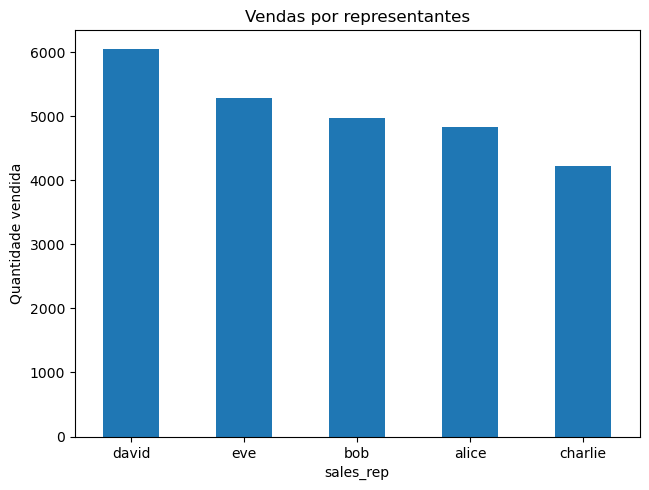

In [144]:
df.groupby('sales_rep').sum()['quantity_sold'].sort_values(ascending = False).plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.title('Vendas por representantes')
plt.ylabel('Quantidade vendida')
plt.show()

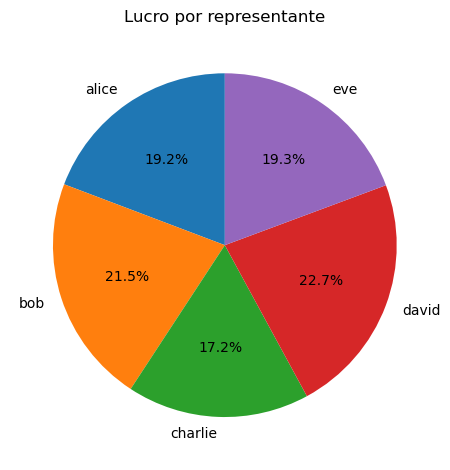

In [128]:
rep_sales = df.groupby('sales_rep').sum()['sales_amount']

rep_sales.plot(
    kind= 'pie',
    autopct= '%1.1f%%',
    startangle= 90,
    legend= False,
    ylabel= ''
)
plt.title('Lucro por representante')
plt.tight_layout()
plt.show()

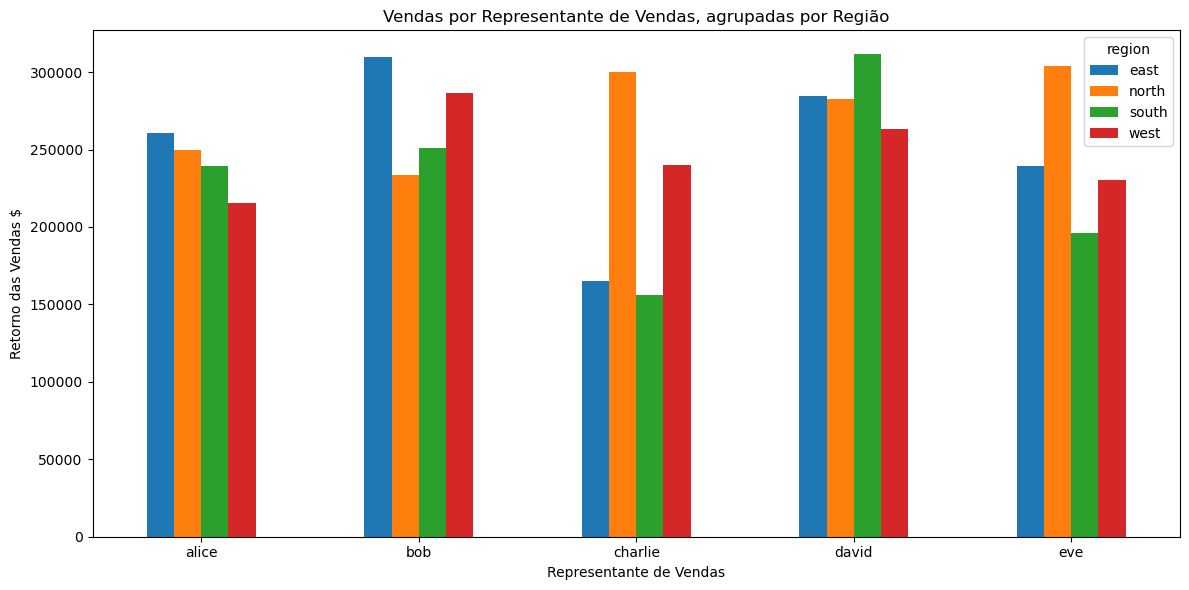

In [158]:
region_sales = df.groupby(['region', 'sales_rep'])['sales_amount'].sum()
region_sales_unstacked = region_sales.unstack(level='region')

region_sales_unstacked.plot(
    kind='bar',
    figsize=(12, 6),
    rot=0 
)

plt.title('Vendas por Representante de Vendas, agrupadas por Região')
plt.xlabel('Representante de Vendas')
plt.ylabel('Retorno das Vendas $')
plt.tight_layout()
plt.show()

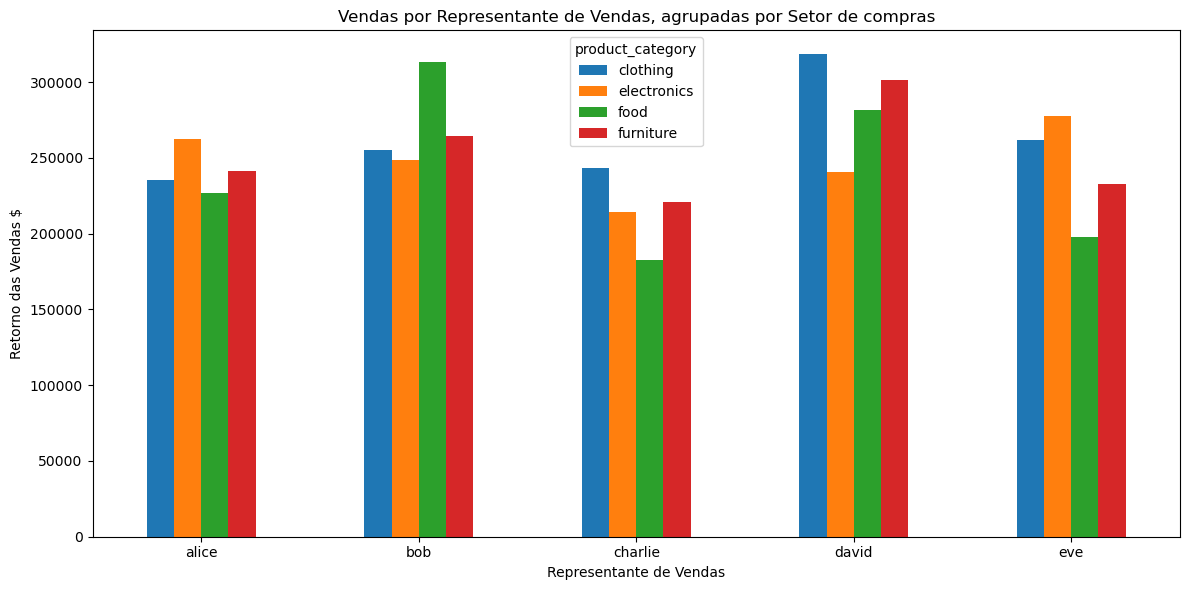

In [157]:
category_sales = df.groupby(['product_category', 'sales_rep'])['sales_amount'].sum()
category_sales_unstacked = category_sales.unstack(level='product_category')

category_sales_unstacked.plot(
    kind='bar',
    figsize=(12, 6),
    rot=0
)

plt.title('Vendas por Representante de Vendas, agrupadas por Setor de compras')
plt.xlabel('Representante de Vendas')
plt.ylabel('Retorno das Vendas $')
plt.tight_layout()
plt.show()

In [131]:
df.columns

Index(['product_id', 'sales_rep', 'region', 'sales_amount', 'quantity_sold',
       'product_category', 'unit_cost', 'unit_price', 'customer_type',
       'discount', 'payment_method', 'sales_channel', 'region_and_sales_rep',
       'year_month'],
      dtype='object')

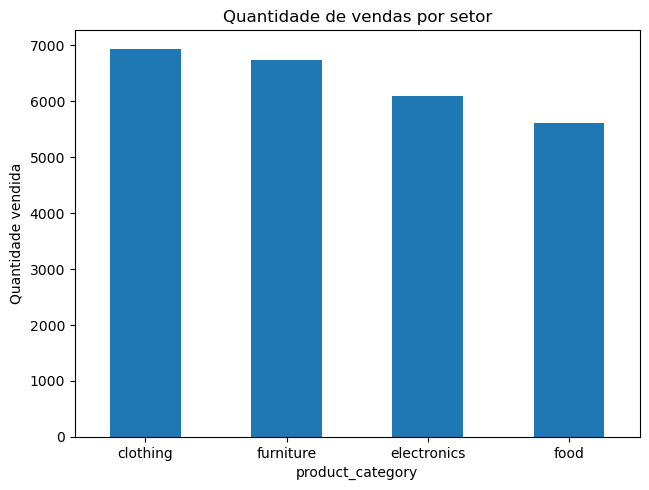

In [160]:
df.groupby('product_category').sum()['quantity_sold'].sort_values(ascending = False).plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.title('Quantidade de vendas por setor')
plt.ylabel('Quantidade vendida')
plt.show()

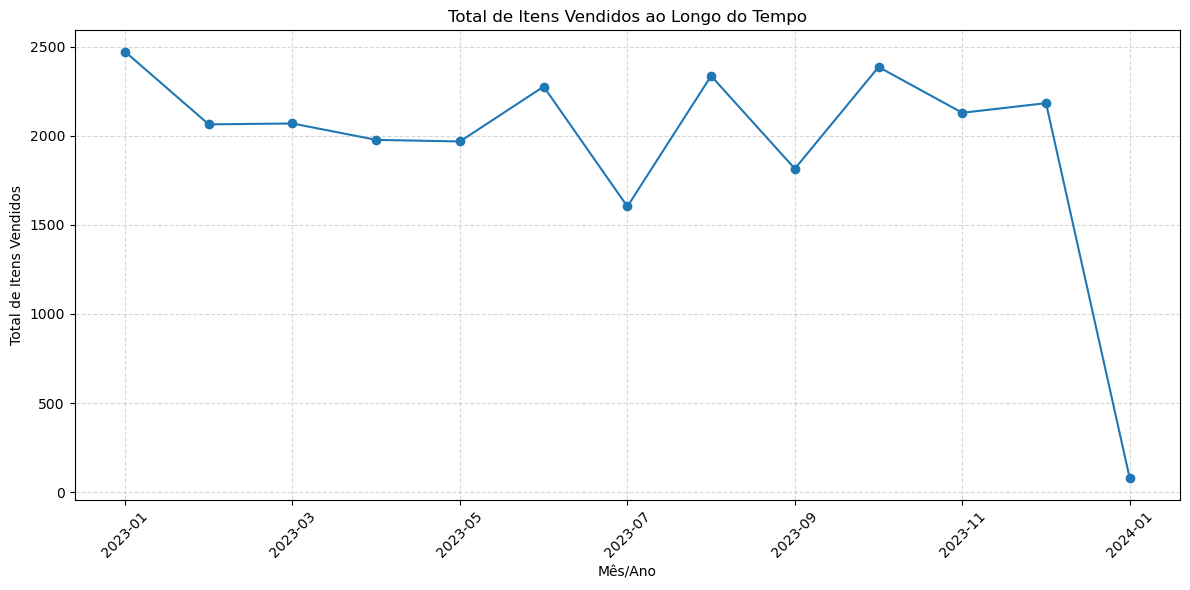

In [133]:
vendas_mensais = df.groupby('year_month')['quantity_sold'].sum()
plt.figure(figsize=(12, 6))
vendas_mensais.plot(kind='line', marker='o') # 'marker=o' adiciona pontos para cada mês

# Adicionar Títulos e Rótulos
plt.title('Total de Itens Vendidos ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Total de Itens Vendidos')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45) # Gira os rótulos 
plt.tight_layout() 
plt.show()

<Figure size 1200x600 with 0 Axes>

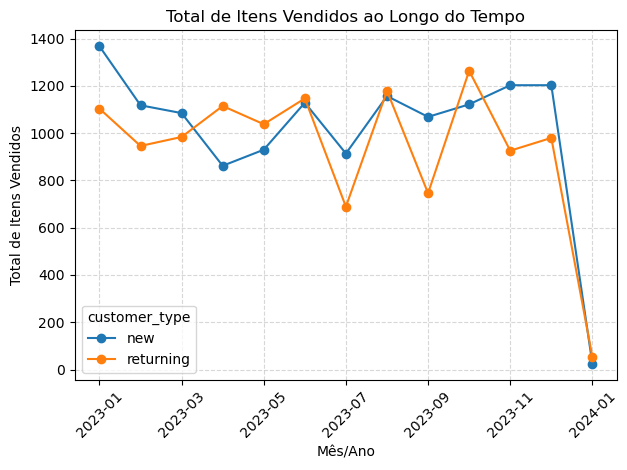

In [134]:
customer_sales= df.groupby(['year_month', 'customer_type'])['quantity_sold'].sum()
customer_sales_unstacked = customer_sales.unstack(level='customer_type')
plt.figure(figsize=(12, 6))
customer_sales_unstacked.plot(kind='line', marker='o') # 'marker=o' adiciona pontos para cada mês

# Adicionar Títulos e Rótulos
plt.title('Total de Itens Vendidos ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Total de Itens Vendidos')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45) # Gira os rótulos 
plt.tight_layout()
plt.show()

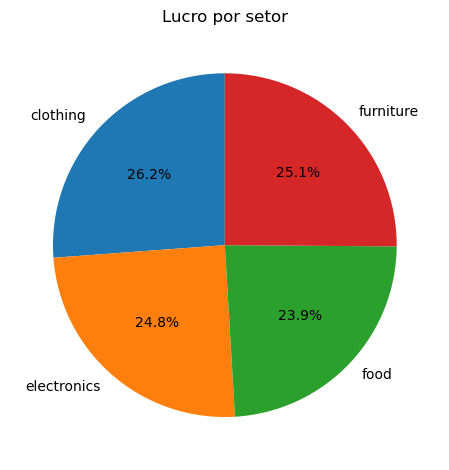

In [149]:
product_sold = df.groupby('product_category')['sales_amount'].sum()
product_sold.plot(
    kind= 'pie',
    autopct= '%1.1f%%',
    startangle= 90,
    legend= False,
    ylabel= ''
)
plt.title('Lucro por setor')
plt.tight_layout()
plt.show()

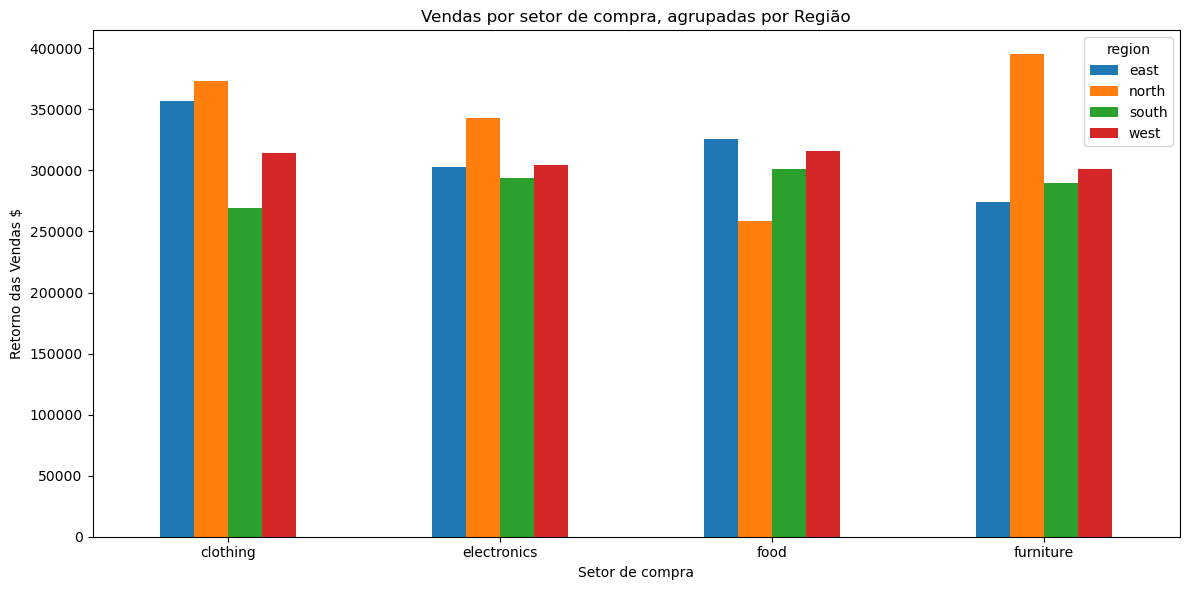

In [155]:
region_sales = df.groupby(['region', 'product_category'])['sales_amount'].sum()
region_sales_unstacked = region_sales.unstack(level='region')

region_sales_unstacked.plot(
    kind='bar',
    figsize=(12, 6),
    rot=0 
)

plt.title('Vendas por setor de compra, agrupadas por Região')
plt.xlabel('Setor de compra')
plt.ylabel('Retorno das Vendas $')
plt.tight_layout()
plt.show()

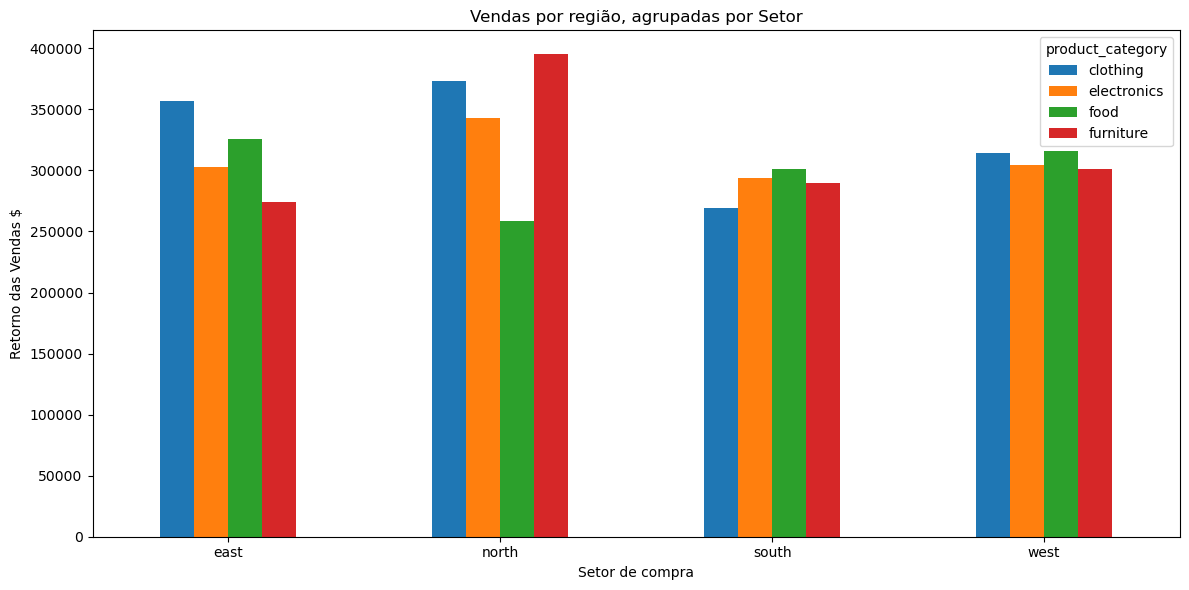

In [156]:
category_sales = df.groupby(['region', 'product_category'])['sales_amount'].sum()
category_sales_unstacked = category_sales.unstack(level='product_category')

category_sales_unstacked.plot(
    kind='bar',
    figsize=(12, 6),
    rot=0 
)

plt.title('Vendas por região, agrupadas por Setor')
plt.xlabel('Setor de compra')
plt.ylabel('Retorno das Vendas $')
plt.tight_layout()
plt.show()

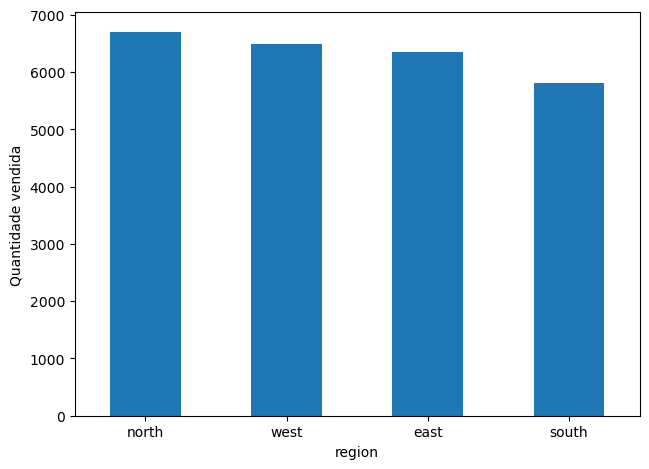

In [140]:
df.groupby('region').sum()['quantity_sold'].sort_values(ascending = False).plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.ylabel('Quantidade vendida')
plt.show()